In [1]:
import pandas as pd  
import numpy as np   
import matplotlib.pyplot as plt  
import seaborn as sns 

from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics  
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error,f1_score

import pickle 

import warnings
warnings.filterwarnings("ignore")

In [2]:
df2= pd.read_csv('df2.csv')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22699 non-null  int64  
 1   passenger_count  22699 non-null  int64  
 2   fare_amount      22699 non-null  float64
 3   mean_distance    22699 non-null  float64
 4   mean_duration    22699 non-null  float64
 5   rush_hour        22699 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.0 MB


In [3]:
# Remove the target column from the features
X = df2.drop(columns=['fare_amount'])

# Set y variable
y = df2[['fare_amount']]

# Display first few rows
X.head()

,VendorID,passenger_count,mean_distance,mean_duration,rush_hour
0,2,6,3.521667,22.847222,0
1,1,1,3.108889,24.470370,0
2,1,1,0.881429,7.250000,1
3,2,1,3.700000,30.250000,0
4,2,1,4.435000,14.616667,0


In [4]:
model_lin = LinearRegression()
model_lin.fit(X,y)

y_pred = model_lin.predict(X)

r2_lin = round(metrics.r2_score(y, y_pred)*100,3)
mse_lin = round(metrics.mean_squared_error(y, y_pred),3)
rmse_lin = round(np.sqrt(mse_lin),3)
mae_lin = round(metrics.mean_absolute_error(y, y_pred),3)

# Create a DataFrame to store the evaluation metrics
metrics_lin = pd.DataFrame({'Model': ['Linear Regression'],                            
                            'R-squared': [r2_lin],
                            'Mean Squared Error (MSE)': [mse_lin],
                            'Root Mean Squared Error (RMSE)': [rmse_lin],
                            'Mean Absolute Error (MAE)': [mae_lin]
                           })

metrics_lin

,Model,R-squared,Mean Squared Error (MSE),Root Mean Squared Error (RMSE),Mean Absolute Error (MAE)
0,Linear Regression,84.543,17.175,4.144,2.171


In [5]:
y_pred_flat = [val[0] for val in y_pred]

# Convert y_pred_flat to a Pandas DataFrame
y_pred_df = pd.DataFrame({'Predicted Values': y_pred_flat})

In [6]:
result = pd.merge(df2,y_pred_df,left_index=True, right_index=True)
result = result[['VendorID','passenger_count','mean_distance','mean_duration','rush_hour','fare_amount','Predicted Values']]
result['residual'] = result['fare_amount']-result['Predicted Values']
result.sample()

,VendorID,passenger_count,mean_distance,mean_duration,rush_hour,fare_amount,Predicted Values,residual
14378,2,1,7.27,18.472222,0,24.0,22.622068,1.377932


### Visualize Multi Linear Regression model results

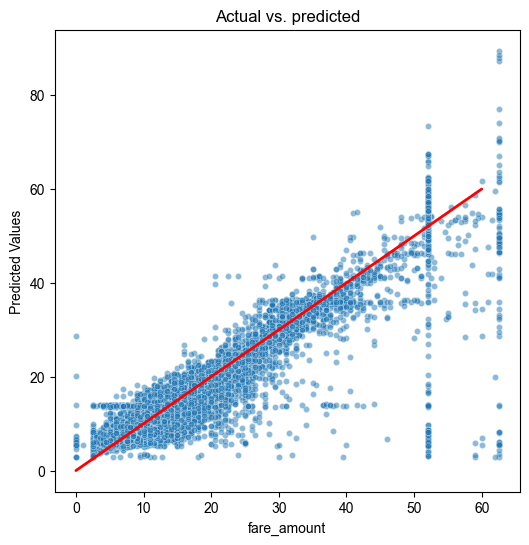

In [7]:
# Create a scatterplot to visualize `predicted` over `actual`
fig, ax = plt.subplots(figsize=(6, 6))
sns.set(style='whitegrid')
sns.scatterplot(x='fare_amount',
                y='Predicted Values',
                data=result,
                s=20,
                alpha=0.5,
                ax=ax
)
# Draw an x=y line to show what the results would be if the model were perfect
plt.plot([0,60], [0,60], c='red', linewidth=2)
plt.title('Actual vs. predicted');

### Visualize the distribution of the residuals using a histogram

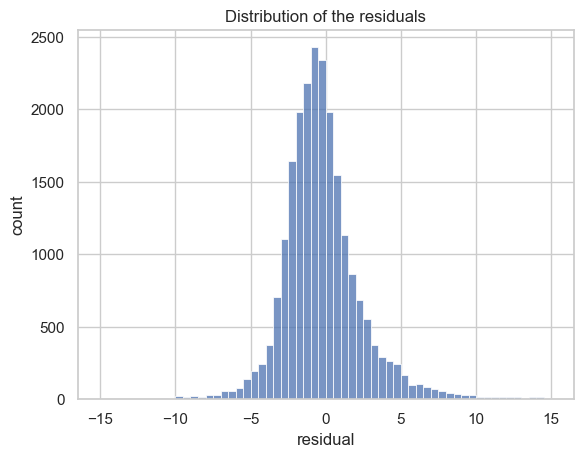

In [8]:
# Visualize the distribution of the `residuals`
sns.histplot(result['residual'], bins=np.arange(-15,15.5,0.5))
plt.title('Distribution of the residuals')
plt.xlabel('residual')
plt.ylabel('count');

### Coefficients

In [9]:
coefficients = pd.DataFrame(model_lin.coef_, columns=X.columns)
coefficients

,VendorID,passenger_count,mean_distance,mean_duration,rush_hour
0,-0.071589,0.022926,2.005503,0.279143,0.291583


#### Note:
The coefficients represent the change in the target variable for a one-unit increase in each respective feature, assuming all other features remain constant. For example, a one-unit increase in mean_distance corresponds to an increase of 2.005503 in the target variable.

### Saving the trained model to a pickle file

In [10]:
# Define the path to the folder where you want to save the model
path = 'F:/Case study/Interview preparation/01.Project/1. Automatidata/Final/'

In [11]:
def write_pickle(path, model_object, save_name:str):
    '''
    save_name is a string.
    '''
    with open(path + save_name + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [12]:
def read_pickle(path, saved_model_name:str):
    '''
    saved_model_name is a string.
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

        return model


In [13]:
write_pickle(path,model_lin,'Automatidata_gui')

In [14]:
result.sample(5)

,VendorID,passenger_count,mean_distance,mean_duration,rush_hour,fare_amount,Predicted Values,residual
15381,2,2,0.824091,4.753409,0,5.5,5.888190,-0.388190
16959,1,1,4.197500,27.922917,0,14.0,19.169849,-5.169849
4799,1,1,1.005758,6.108081,1,4.5,6.970917,-2.470917
6420,2,2,0.860278,10.688426,0,10.0,7.617484,2.382516
1331,2,1,0.753182,5.856818,0,4.5,6.031065,-1.531065


##  Graphical user interface (GUI)

In [15]:
from tkinter import *
import pickle 
from sklearn import *

def show_entry_fields():
    p1=float(e1.get())
    p2=float(e2.get())
    p3=float(e3.get())
    p4=float(e4.get())
    p5=float(e5.get())
  
    model = read_pickle(path,'Automatidata_gui')

    input_features = [p1, p2, p3, p4, p5]
   
    
    print('input_features',input_features)
     
    result5=model.predict([input_features])
  
    Label(master,text='The fare amount is approximately ($)').grid(row=8)
    Label(master,text=result5).grid(row=9)
    print("The fare amount is approximately",result5)

    
master = Tk()
master.title("Taxi Fares Estimater")


label = Label(master, text = " Predicting Taxi Fare Amount Using Machine Learning"
                          , bg = "black", fg = "white"). \
                               grid(row=0,columnspan=2)


Label(master, text="VendorID - [1, 2]  ").grid(row=1)
Label(master, text="passenger_count [1 to 6]").grid(row=2)
Label(master, text="Distance").grid(row=3)
Label(master, text="Duration").grid(row=4)
Label(master, text="rush_hour [no-0 ,yes-1]").grid(row=5)

e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)

Button(master, text='Predict fare', command=show_entry_fields).grid()


mainloop()

input_features [2.0, 2.0, 0.824091, 4.753409, 0.0]
The fare amount is approximately [[5.88819043]]
